In [1]:
!pip install opencv-python
!pip install pillow


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL.Image as Image
import gym
import random

from gym import Env, spaces
import time

font = cv2.FONT_HERSHEY_COMPLEX_SMALL

In [27]:
class ChopperScape(Env):
    def __init__(self):
        super(ChopperScape, self).__init__()


        #define 2D observation space
        self.observation_shape = (600, 800, 3)
        self.observation_space = spaces.Box(low = np.zeros(self.observation_shape),
                                            high= np.ones(self.observation_shape),
                                            dtype= np.float16)
        # Define Action Space
        self.action_space = spaces.Discrete(6,)

        # Create a canvas to render environment images on
        self.canvas = np.ones(self.observation_shape) * 1

        # Define elements present inside the environment
        self.elements = []

        # Maximum fuel
        self.max_fuel = 1000

        # Permissables area of helicopter to be
        self.y_min = int (self.observation_shape[0] * 0.1)
        self.x_min = 0
        self.y_max = int (self.observation_shape[0] * .9)
        self.x_max = self.observation_shape[1]

    def draw_elements_on_canvas(self):
        # Init the canvas 
        self.canvas = np.ones(self.observation_shape) * 1

        # Draw the heliopter on canvas
        for elem in self.elements:
            elem_shape = elem.icon.shape
            x,y = elem.x, elem.y
            self.canvas[y : y + elem_shape[1], x:x + elem_shape[0]] = elem.icon

        text = 'Fuel Left: {} | Rewards: {}'.format(self.fuel_left, self.ep_return)

        # Put the info on canvas 
        self.canvas = cv2.putText(self.canvas, text, (10,20), font,  
                0.8, (0,0,0), 1, cv2.LINE_AA)

    def reset(self):
        # Reset the fuel consumed
        self.fuel_left = self.max_fuel

        # Reset the reward
        self.ep_return  = 0

        # Number of birds
        self.bird_count = 0
        self.fuel_count = 0

        # Determine a place to intialise the chopper in
        x = random.randrange(int(self.observation_shape[0] * 0.05), int(self.observation_shape[0] * 0.10))
        y = random.randrange(int(self.observation_shape[1] * 0.15), int(self.observation_shape[1] * 0.20))
        
        # Intialise the chopper
        self.chopper = Chopper("chopper", self.x_max, self.x_min, self.y_max, self.y_min)
        self.chopper.set_position(x,y)

        # Intialise the elements 
        self.elements = [self.chopper]

        # Reset the Canvas 
        self.canvas = np.ones(self.observation_shape) * 1

        # Draw elements on the canvas
        self.draw_elements_on_canvas()


        # return the observation
        return self.canvas 
    
    def get_action_meanings(self):
        return {0: "Right", 1: "Left", 2: "Down", 3: "Up", 4: "Do Nothing"}
    
        assert self.action_space.contains(action), "Invalid Action"

In [13]:
class Point(object):
    def __init__(self, name, x_max, x_min, y_max, y_min):
        self.x = 0
        self.y = 0
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.name = name
    
    def set_position(self, x, y):
        self.x = self.clamp(x, self.x_min, self.x_max - self.icon_w)
        self.y = self.clamp(y, self.y_min, self.y_max - self.icon_h)
    
    def get_position(self):
        return (self.x, self.y)
    
    def move(self, del_x, del_y):
        self.x += del_x
        self.y += del_y
        
        self.x = self.clamp(self.x, self.x_min, self.x_max - self.icon_w)
        self.y = self.clamp(self.y, self.y_min, self.y_max - self.icon_h)

    def clamp(self, n, minn, maxn):
        return max(min(maxn, n), minn)
        

In [21]:
class Chopper(Point):
    def __init__(self, name, x_max, x_min, y_max, y_min):
        super(Chopper, self).__init__(name, x_max, x_min, y_max, y_min)
        self.icon = cv2.imread("chopper.png") 
        self.icon_w = 64
        self.icon_h = 64
        self.icon = cv2.resize(self.icon, (self.icon_h, self.icon_w))

    
class Bird(Point):
    def __init__(self, name, x_max, x_min, y_max, y_min):
        super(Bird, self).__init__(name, x_max, x_min, y_max, y_min)
        self.icon = cv2.imread("bird.png") / 255.0
        self.icon_w = 32
        self.icon_h = 32
        self.icon = cv2.resize(self.icon, (self.icon_h, self.icon_w))
    
class Fuel(Point):
    def __init__(self, name, x_max, x_min, y_max, y_min):
        super(Fuel, self).__init__(name, x_max, x_min, y_max, y_min)
        self.icon = cv2.imread("fuel.png") / 255.0
        self.icon_w = 32
        self.icon_h = 32
        self.icon = cv2.resize(self.icon, (self.icon_h, self.icon_w))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'self' is not defined

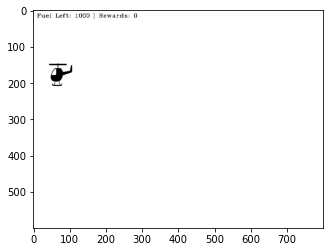

In [25]:
env = ChopperScape()
obs = env.reset()
plt.imshow(obs)


